In [1]:
import pandas as pd
data = pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [2]:
data.rename(columns={'Delivery Time':'DelTime' , 'Sorting Time':'SortTime'}, inplace = True)
data

,DelTime,SortTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DelTime   21 non-null     float64
 1   SortTime  21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


### Correlation

In [4]:
data.corr()

,DelTime,SortTime
DelTime,1.000000,0.825997
SortTime,0.825997,1.000000


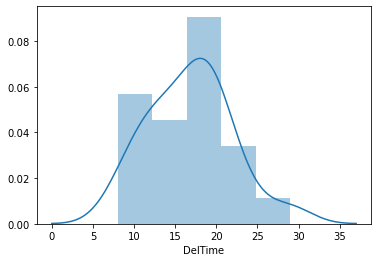

In [5]:
import seaborn as sns
sns.distplot(data['DelTime'])

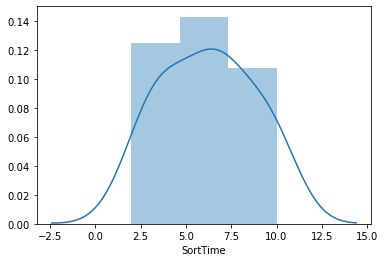

In [6]:
sns.distplot(data['SortTime'])

### Fit a Linear Regression Model

In [7]:
import statsmodels.formula.api as smf
model = smf.ols("DelTime ~ SortTime", data = data).fit()

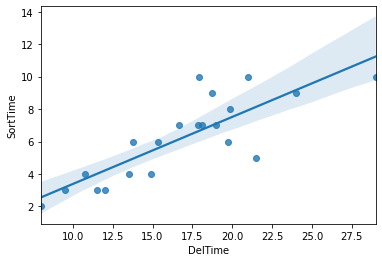

In [8]:
sns.regplot(x = 'DelTime' , y = 'SortTime', data = data)

In [9]:
# Co-efficients
model.params

Intercept    6.582734
SortTime     1.649020
dtype: float64

In [10]:
# t-value & p-value
print(model.tvalues, '\n', model.pvalues)

Intercept    3.823349
SortTime     6.387447
dtype: float64 
 Intercept    0.001147
SortTime     0.000004
dtype: float64


In [11]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

### Predict for new Data points

In [12]:
newdata = pd.Series([15,20])
data_pred = pd.DataFrame(newdata, columns=['SortTime'])

In [13]:
model.predict(data_pred)

0    31.318032
1    39.563132
dtype: float64